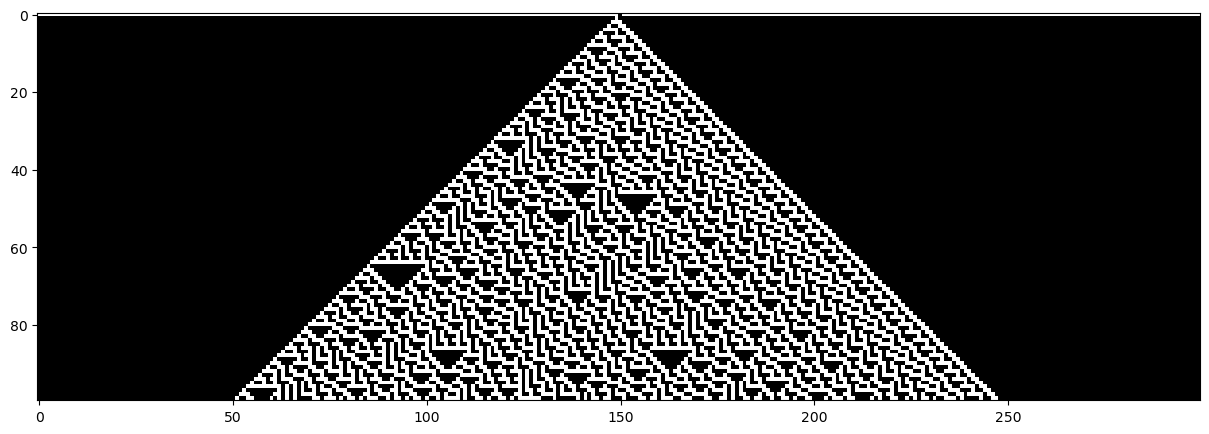

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generate_rule30(width, height):
    # Initialize the cellular automaton with a single live cell in the middle of the first row
    automaton = np.zeros((height, width), dtype=int)
    automaton[0, width // 2] = 1
    
    # Define the Rule 30 transition rule
    rule30 = np.array([1, 0, 0, 0, 0, 1, 1, 1], dtype=int)

    for i in range(1, height):
        # Use numpy's efficient convolution to apply the rule to each neighborhood
        neighborhood = np.column_stack((np.roll(automaton[i - 1], -1), automaton[i - 1], np.roll(automaton[i - 1], 1)))
        automaton[i] = rule30[7 - np.sum(neighborhood * np.array([4, 2, 1]), axis=1)]

    return automaton

def plot_rule30(automaton):
    plt.figure(figsize=(15,15))
    plt.imshow(automaton, cmap="binary", interpolation="nearest")
    plt.show()

width = 300  # Width of the automaton (odd to have a centered initial cell)
height = 100  # Height of the automaton

rule30_automaton = generate_rule30(width, height)
plot_rule30(rule30_automaton)
